# Downloading data
Go to the [Kaggle download page](https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption?resource=download)

## Import the data and libraries & Set Up 

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [110]:
# Read the data from the pjme-data dataset
energy_df = pd.read_csv('DAYTON_hourly.csv')

# For joining purposes
energy_df.set_index('Datetime', inplace=True) 

# We need same type when joining (other dataset wil have datetime)
energy_df.index = pd.to_datetime(energy_df.index)

# Display the first few rows of the dataframe
energy_df.head(-10)

# dayton_temp_df.head(num) - helps specify how many rows of the dataframe you want to see

,DAYTON_MW
Datetime,
2004-12-31 01:00:00,1596.0
2004-12-31 02:00:00,1517.0
2004-12-31 03:00:00,1486.0
2004-12-31 04:00:00,1469.0
2004-12-31 05:00:00,1472.0
...,...
2018-01-01 10:00:00,2452.0
2018-01-01 11:00:00,2481.0
2018-01-01 12:00:00,2480.0


In [111]:
dayton_temp_df = pd.read_csv('dayton-temp.csv')

# Convert 'DATE' column to datetime, assuming the year is 2010
dayton_temp_df['DATE'] = pd.to_datetime('2010-' + dayton_temp_df['DATE'].str[:5] + dayton_temp_df['DATE'].str[5:], format='%Y-%m-%dT%H:%M:%S')

# Set the 'DATE' column as the index
dayton_temp_df.set_index('DATE', inplace=True)

# Display the first few rows to verify
print(dayton_temp_df.head())

                         STATION  LATITUDE  LONGITUDE  ELEVATION  \
DATE                                                               
2010-01-01 01:00:00  USW00093815   39.9064   -84.2185      305.7   
2010-01-01 02:00:00  USW00093815   39.9064   -84.2185      305.7   
2010-01-01 03:00:00  USW00093815   39.9064   -84.2185      305.7   
2010-01-01 04:00:00  USW00093815   39.9064   -84.2185      305.7   
2010-01-01 05:00:00  USW00093815   39.9064   -84.2185      305.7   

                     HLY-CLDH-NORMAL HLY-CLDH-NORMAL_ATTRIBUTES  \
DATE                                                              
2010-01-01 01:00:00              0.0                          C   
2010-01-01 02:00:00              0.0                          C   
2010-01-01 03:00:00              0.0                          C   
2010-01-01 04:00:00              0.0                          C   
2010-01-01 05:00:00              0.0                          C   

                     HLY-CLOD-PCTBKN HLY-CLOD-PCTBKN_

In [112]:
energy_temp_df = energy_df.join(dayton_temp_df, how='inner')
energy_temp_df.head()

,DAYTON_MW,STATION,LATITUDE,LONGITUDE,ELEVATION,HLY-CLDH-NORMAL,HLY-CLDH-NORMAL_ATTRIBUTES,HLY-CLOD-PCTBKN,HLY-CLOD-PCTBKN_ATTRIBUTES,HLY-CLOD-PCTCLR,...,HLY-WIND-2NDPCT,HLY-WIND-2NDPCT_ATTRIBUTES,HLY-WIND-AVGSPD,HLY-WIND-AVGSPD_ATTRIBUTES,HLY-WIND-PCTCLM,HLY-WIND-PCTCLM_ATTRIBUTES,HLY-WIND-VCTDIR,HLY-WIND-VCTDIR_ATTRIBUTES,HLY-WIND-VCTSPD,HLY-WIND-VCTSPD_ATTRIBUTES
Datetime,,,,,,,,,,,,,,,,,,,,,
2010-12-31 01:00:00,1553.0,USW00093815,39.9064,-84.2185,305.7,0.0,C,54,C,218,...,209,C,10.3,C,44,C,242,C,4.8,C
2010-12-31 02:00:00,1483.0,USW00093815,39.9064,-84.2185,305.7,0.0,C,55,C,223,...,216,C,10.4,C,51,C,240,C,4.9,C
2010-12-31 03:00:00,1439.0,USW00093815,39.9064,-84.2185,305.7,0.0,C,73,C,229,...,205,C,10.2,C,49,C,240,C,4.7,C
2010-12-31 04:00:00,1418.0,USW00093815,39.9064,-84.2185,305.7,0.0,C,50,C,223,...,203,C,10.3,C,49,C,240,C,4.6,C
2010-12-31 05:00:00,1432.0,USW00093815,39.9064,-84.2185,305.7,0.0,C,65,C,221,...,201,C,10.4,C,36,C,241,C,4.7,C


# Clean the data

In [113]:
# Remove all columns which is not HLY-TEMP-NORMAL, and DAYTON_MW
energy_temp_df = energy_temp_df[['HLY-TEMP-NORMAL', 'DAYTON_MW']]
energy_temp_df.head()

,HLY-TEMP-NORMAL,DAYTON_MW
Datetime,,
2010-12-31 01:00:00,28.9,1553.0
2010-12-31 02:00:00,28.6,1483.0
2010-12-31 03:00:00,28.2,1439.0
2010-12-31 04:00:00,27.9,1418.0
2010-12-31 05:00:00,27.7,1432.0


In [114]:
# drop rows with missing values
energy_temp_df.dropna(inplace=True)

# Visualizing the data

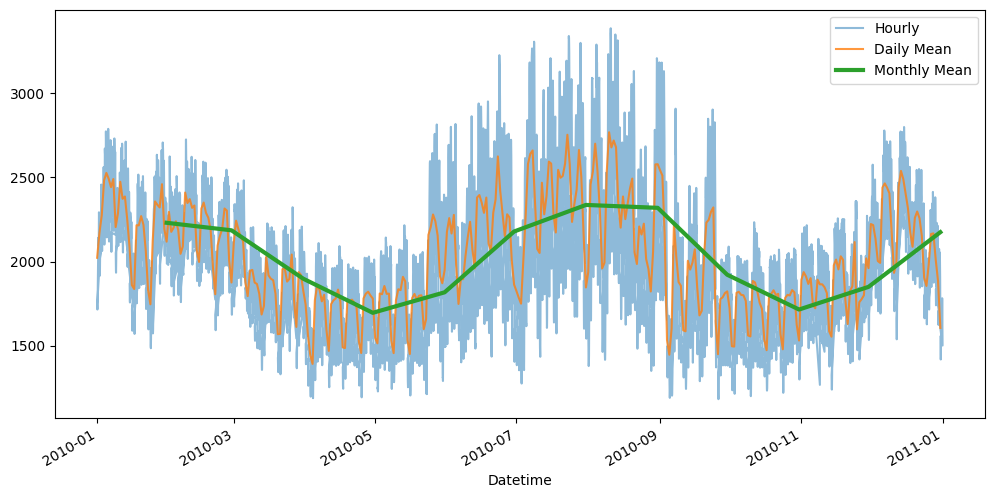

In [115]:
# Plotting the data

plt.figure(figsize=(12, 6))
energy_temp_df['DAYTON_MW'].plot(label='Hourly', alpha=0.5)
energy_temp_df.resample('D').mean()['DAYTON_MW'].plot(label='Daily Mean', alpha=0.8)
energy_temp_df.resample('ME').mean()['DAYTON_MW'].plot(label='Monthly Mean', linewidth=3)
plt.legend()


/var/folders/t0/57ll0lkj2bsbk7dy9nzt_d9h0000gn/T/ipykernel_7676/3335276836.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  energy_temp_df.resample('H').mean()['HLY-TEMP-NORMAL'].plot(label='Hourly', alpha=0.5)
/var/folders/t0/57ll0lkj2bsbk7dy9nzt_d9h0000gn/T/ipykernel_7676/3335276836.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  energy_temp_df.resample('M').mean()['HLY-TEMP-NORMAL'].plot(label='Monthly Mean', linewidth=3)


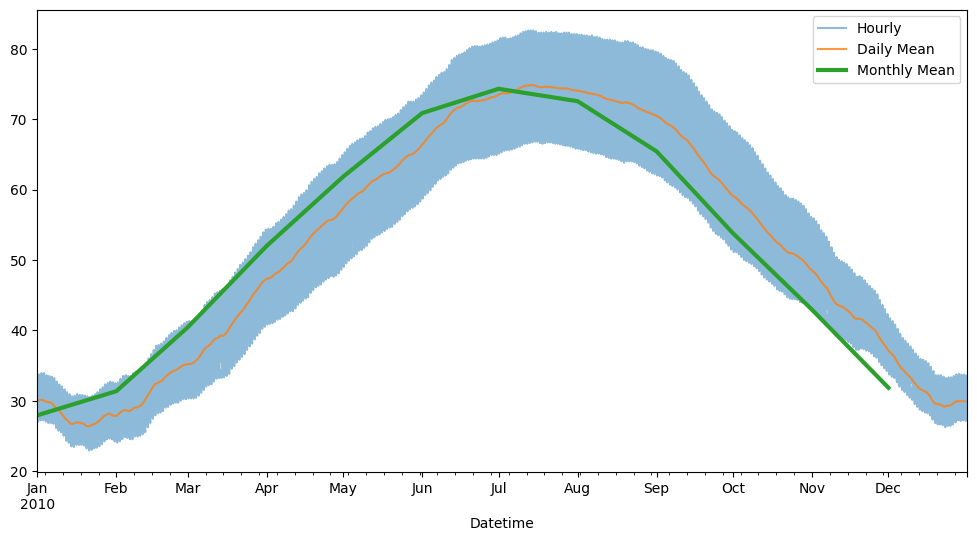

In [116]:
# set up the legend for hourly, daily, and monthly

plt.figure(figsize=(12, 6))
energy_temp_df.resample('H').mean()['HLY-TEMP-NORMAL'].plot(label='Hourly', alpha=0.5)
energy_temp_df.resample('D').mean()['HLY-TEMP-NORMAL'].plot(label='Daily Mean', alpha=0.8)
energy_temp_df.resample('M').mean()['HLY-TEMP-NORMAL'].plot(label='Monthly Mean', linewidth=3)
plt.legend()


In [117]:
def do_stats(df, x_col, y_col):
    # Drop all rows with NaN values
    df.dropna(inplace=True)

    # Add a constant to the independent value
    X = sm.add_constant(df[x_col])

    # Fit the model with the temperature as the independent variable and energy consumption as the dependent variable
    model = sm.OLS(df[y_col], X)

    results = model.fit()

    # Print out the statistics
    print(results.summary())

    # Plot the data and the best fit line
    plt.figure(figsize=(12, 6))
    plt.scatter(energy_temp_df[x_col], energy_temp_df[y_col], alpha=0.5)
    plt.plot(energy_temp_df[x_col], results.predict(), color='red', linewidth=3)
    plt.xlabel('Temperature')
    plt.ylabel('Energy Consumption')
    plt.title('Energy Consumption vs Temperature')
    plt.show()

This doesn't yield great results (we can see that clearly from the graph, but it's verified using R^2)

                            OLS Regression Results                            
Dep. Variable:              DAYTON_MW   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     324.7
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           2.69e-71
Time:                        23:52:24   Log-Likelihood:                -65005.
No. Observations:                8756   AIC:                         1.300e+05
Df Residuals:                    8754   BIC:                         1.300e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1789.3483     13.879    1

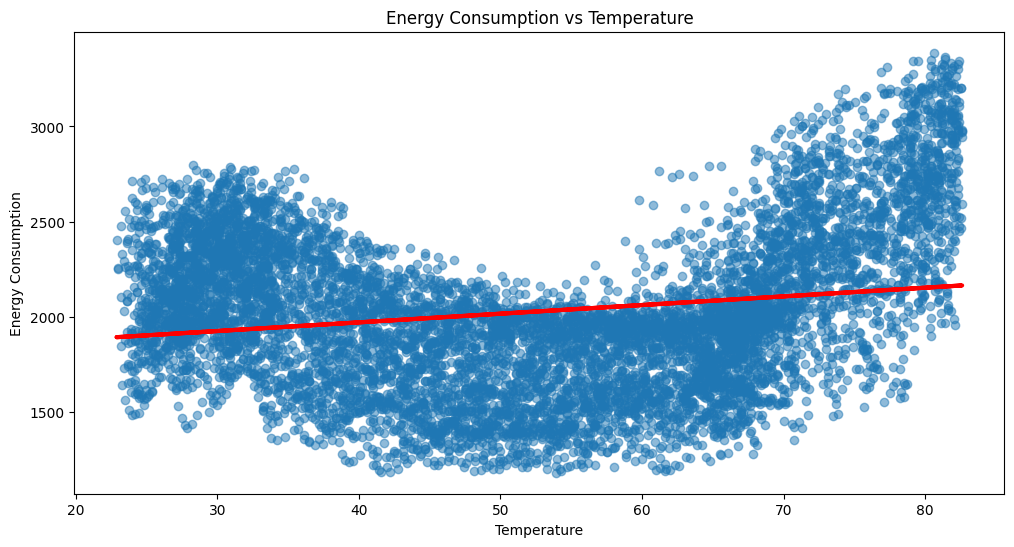

In [118]:
do_stats(energy_temp_df, 'HLY-TEMP-NORMAL', 'DAYTON_MW')

In [130]:
# Make a new column for the absolute value of the different between the actual temperature and 55 degrees
energy_temp_df['TEMP_DIFF'] = np.abs(energy_temp_df['HLY-TEMP-NORMAL'] - 50)

                            OLS Regression Results                            
Dep. Variable:              DAYTON_MW   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     6050.
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:08:36   Log-Likelihood:                -62864.
No. Observations:                8756   AIC:                         1.257e+05
Df Residuals:                    8754   BIC:                         1.257e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1545.8067      7.055    219.096      0.0

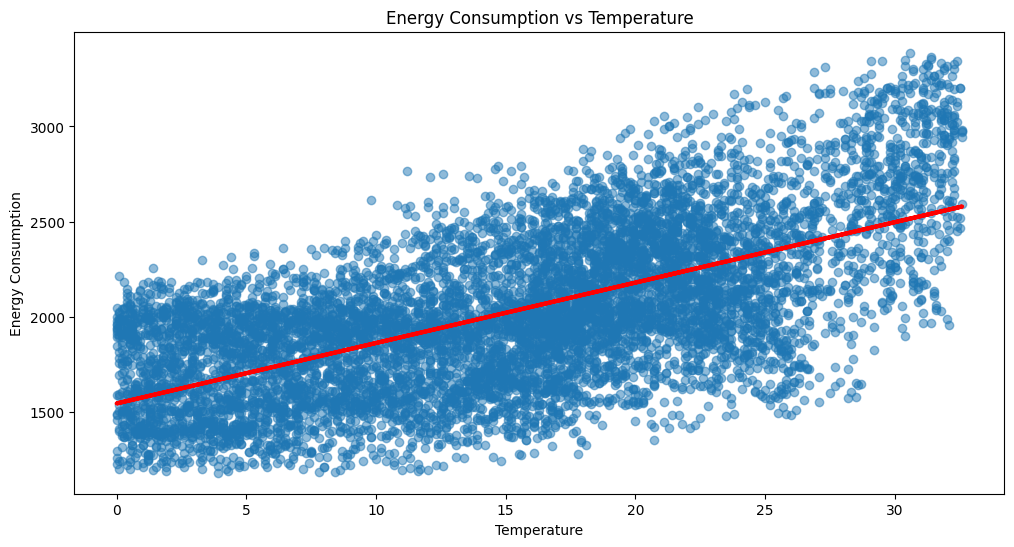

In [131]:
do_stats(energy_temp_df, 'TEMP_DIFF', 'DAYTON_MW')